# Логистическая регрессия для многоклассовой классификации

Будем решать задачу многоклассовой классификации на классическом датасете iris, в котором классы линейно разделимы -  значит логистическая регрессия даст хороший результат.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Загружаем датасет

In [2]:
iris = datasets.load_iris()

Подробнее изучить информацию о датасете можно либо загуглив,либо, к примеру так.

In [3]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**1. Готовим данные для обучения. (1 балл)**   
Создайте матрицу признаков Х, которая убдет содержать состоит из (3) - petal length in cm и (4) - petal width in cm.  
Определите вектор классов у.  

In [4]:
x = iris['data'][:, [2, 3]]
y = iris['target']

**2. Визуализация данных (2 балла)**  
C помощью matplotlib и scatter plot визуализируйте датасет. Результат должен быть как на картинке. Цвета точек можно задать параметром c=y.
- Правильно построенные график - 1 балл.
- Подписанные оси - 1 балл.
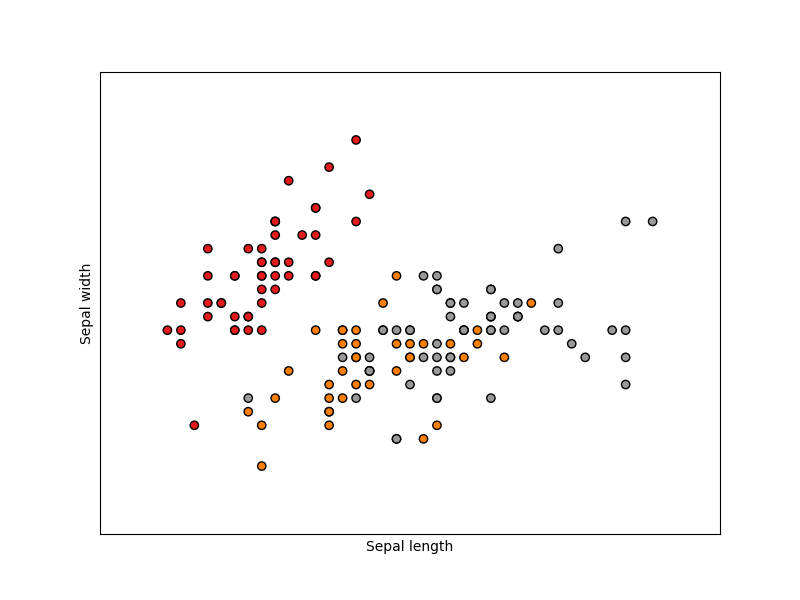


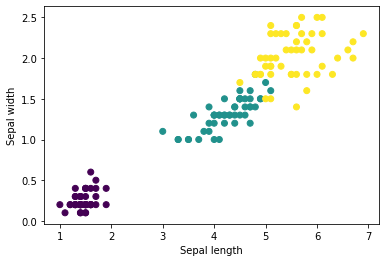

In [5]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

Вспомним, что фукнция sigmoid имеет вид:
$$g(z) = {1 \over 1 + e^{-z}}$$


Функция гипотезы имеет вид:
$$h_ \theta(x) = g(\theta^T x)$$


In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

В качестве функции потерь мы в бинарной классификации используем бинарную кросс  (перекрёстнную) энтропию, которую считаем по формуле:
$$J(\theta) = {1 \over m} \sum\limits_ {i=1}^{m} [-y^{(i)} \log h_ \theta (x^{(i)}) - (1 - y^{(i)}) \log (1-h_ \theta (x^{(i)}))]$$

Кстати, чтобы понять, почему "перекрёстная",мы можем просто визуализировать её. Целевая переменная может принимать значения 1 или 0.

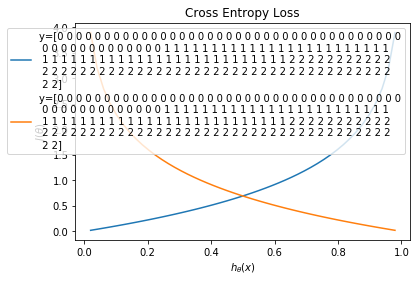

In [7]:
h = np.linspace(0, 1)[1:-1]
for z in [0, 1]:
    plt.plot(h, -z * np.log(h) - (1 - z) * np.log(1 - h), label=f"y={y}")
plt.title("Cross Entropy Loss") 
plt.xlabel('$h_ {\\theta}(x)$'); plt.ylabel('$J(\\theta)$')
plt.legend();

Мы можем видеть, что правильный прогноз класса будет значение функции потерь 0. При этом значение функции потерь стремится к бесконечности, когда прогноз ближе к неправильному классу.

Градиент бинарной бинарной кросс энтропии имеет вид:  
$${\partial J(\theta)\over \partial\theta} = {1 \over m} \sum\limits_ {i=1}^{m} (h_ \theta (x^{(i)})-y^{(i)})x^{(i)}$$

**3. Напишите функцию, которая возвращает значение функции ошибки ошибки и её градиента
 (3 балла)**

In [8]:
def cost(theta, x, y):
    h = sigmoid(x @ theta)
    cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    grad = np.dot((h - y), x) / len(y)
    return cost, grad

**4. Напишите функцию fit(...) которая будет выполнять классификацию по стратегии [one-vs.-rest](https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest) (cost function)(1 балл)**  

Обновление параметров необходимо делать согласно градиентному спуску.

In [9]:
def fit(x, y, max_iter=5000, alpha=0.1):
    # a way to add a column of ones
    x = np.insert(x, 0, 1, axis=1)
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)

    for c in classes:
        binary_y = np.where(y == c, 1, 0)
        theta = np.zeros(x.shape[1])
        for epoch in range(max_iter):
            error, grad = cost(theta, x, binary_y)
            costs[epoch] += error
            theta = theta - alpha * grad
        thetas.append(theta)
    return thetas, classes, costs

**5. Напишите функцию predict(...), которая будет давать предсказания классов (дискретные значения) (3 балла).**

In [10]:
def predict(thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    preds = np.array([np.argmax(np.array([sigmoid(sample @ theta) for theta in thetas])) for sample in x])
    return preds

Запускаем тренировку и строим график функции потерь.

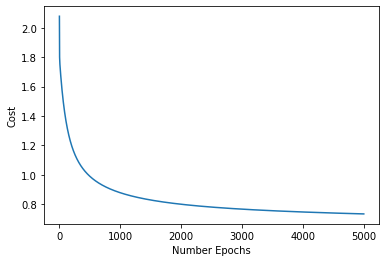

In [11]:
thetas, classes, costs = fit(x, y)
plt.plot(costs)
plt.xlabel('Number Epochs'); plt.ylabel('Cost');

Посмотрим на линии, которые мы нашли в результате обучения модели и как они разделяют классы.
Если всё прошло правильно, то должно получиться нечно такое:
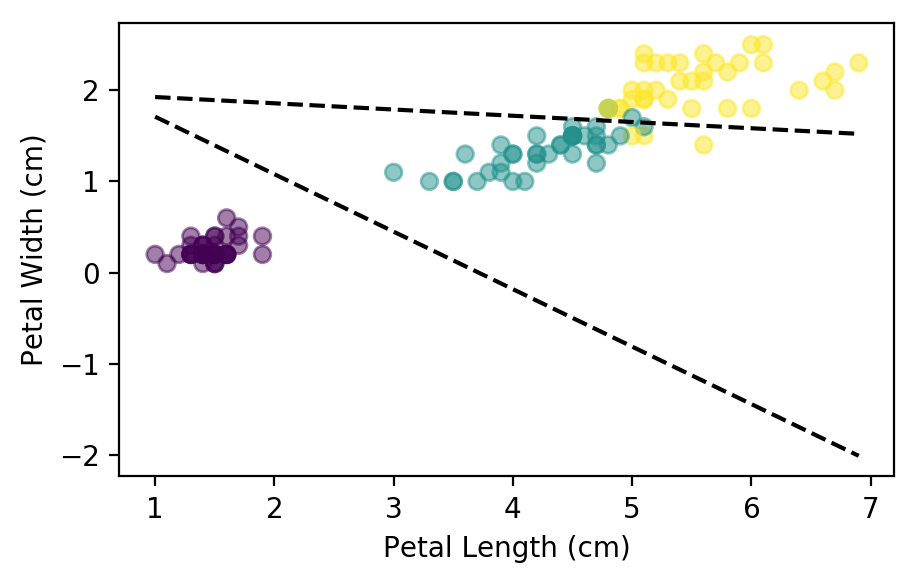

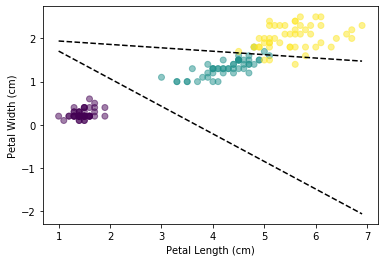

In [12]:
plt.scatter(x[:, 0], x[:, 1], c=y, alpha=0.5)
plt.xlabel("Petal Length (cm)"); plt.ylabel("Petal Width (cm)");
for theta in [thetas[0], thetas[2]]:
    j = np.array([x[:, 0].min(), x[:, 0].max()])
    k = -(j * theta[1] + theta[0]) / theta[2]
    plt.plot(j, k, color='k', linestyle="--")

**6. Посчитайте точность классификации - accuracy.** 
    - Имплементируйте самостоятельно функцию accuracy - 1 балл  
    - Воспользуйтесь функцией sklearn.metrics.accuracy_score  - 1 балл

In [13]:
def manual_accuracy(x, thetas, y):
    pred = predict(thetas, x)
    score = (sum(pred == y)) / len(y)
    return score

print('manual_accuracy:', manual_accuracy(x, thetas, y))

manual_accuracy: 0.94


In [14]:
def sklearn_accuracy(x, thetas, y):
    from sklearn.metrics import accuracy_score
    pred = predict(thetas, x)
    score = accuracy_score(y, pred, normalize=True, sample_weight=None)
    return score

print('sklearn_accuracy:', sklearn_accuracy(x, thetas, y))

sklearn_accuracy: 0.94


**7. Выведите [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) классификации c помощью фукнции metrics.confusion_matrix (1 балл)**

In [15]:
from sklearn.metrics import confusion_matrix
pred = predict(thetas, x)
confusion = confusion_matrix(y, pred)
print(confusion)

[[50  0  0]
 [ 0 45  5]
 [ 0  4 46]]


**7*. Какие классы больше всего модель путает между собой? Дать ответ в виде названия классов, а не [0,1,2] (2 балла)**

In [16]:
print(iris['target_names'][1], 'and', iris['target_names'][2])

versicolor and virginica


**8. Посчитайте precision, recall, F-1 score для классификации классов 0 и 1.**
То есть задача сводится к подсчёту результата бинарной классификации.

    - Имплементируйте три метрики самостоятельно - 3 балла (по 1 баллу за каждую метрику) 
    - Воспользуйтесь функцией sklearn.metrics.precision_recall_fscore_support  - 3 балла (по 1 баллу за каждую метрику) 

In [17]:
# Positive = to be virginica that is to be 2nd class and not to be 0th or 1st
y_bin = y == 2
thetas, classes, costs = fit(x, y_bin)
pred = predict(thetas, x)
confusion = confusion_matrix(y_bin, pred)
precision = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])
recall = confusion[1, 1] / (confusion[1, 1] + confusion[1, 0])
f1_score = 2 * precision * recall / (precision + recall)
print('precision:', precision, 'recall:', recall, 'f1_score:', f1_score)
from sklearn.metrics import precision_recall_fscore_support
skl_mentix = precision_recall_fscore_support(y_bin, pred)
print('precision:', skl_mentix[0][1], 'recall:', skl_mentix[1][1], 'f1_score:', skl_mentix[2][1])

precision: 0.9591836734693877 recall: 0.94 f1_score: 0.9494949494949495
precision: 0.9591836734693877 recall: 0.94 f1_score: 0.9494949494949495
